# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [88]:
import pandas as pd
from flatiron_stats import *
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [16]:
#Your code here

data = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
schema = pd.read_csv('schema.csv', encoding='latin1')

print(data.columns)
data.head()


Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
schema.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [47]:
#Your code here

#H0: There is no difference between the salaries of people with bachelors degrees
#    and the salaries of people with masters degrees. 
#    i.e. mu(salary bachelors) = mu(salary masters)

#HA: There salaries of people with masters degrees are greater than the salaries
#    of people with bachelors degrees. 
#    i.e. mu(salary masters) > mu(salary bachelors)

bach_salaries = data[data['FormalEducation']=='Bachelor\'s degree']['AdjustedCompensation'].dropna()
mast_salaries = data[data['FormalEducation']=='Master\'s degree']['AdjustedCompensation'].dropna()



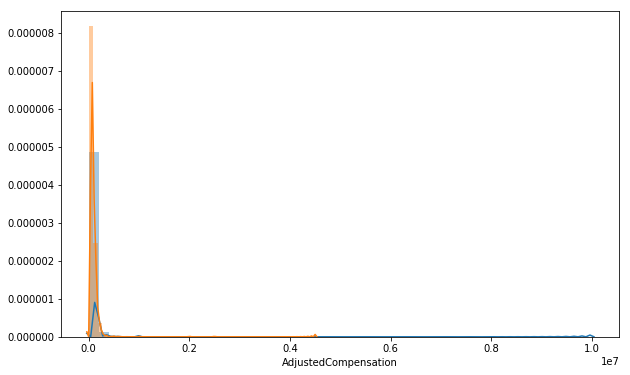

In [65]:
fig = plt.figure(figsize=(10,6))
sns.distplot(bach_salaries)
sns.distplot(mast_salaries)
plt.show()

In [72]:
print('Comparison of {} for {} and {}'.format('AdjustedCompensation', 'Master\'s degree', 'Bachelor\'s degree'))
print("Median Values: \tMaster\'s: {} \tBachelor\'s: {}".format(round(mast_salaries.median(),2), round(bach_salaries.median(),2)))
print("Mean Values: \tMaster\'s: {} \tBachelor\'s: {}".format(round(mast_salaries.mean(),2), round(bach_salaries.mean(),2)))
print("Sample Sizes: \tMaster\'s: {} \tBachelor\'s: {}".format(len(mast_salaries), len(bach_salaries)))
print("Welch's t-test p-value:", p_value_welch_ttest(mast_salaries, bach_salaries))
                                                               
                                                               

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	Master's: 53812.17 	Bachelor's: 38399.4
Mean Values: 	Master's: 69139.9 	Bachelor's: 64887.1
Sample Sizes: 	Master's: 1990 	Bachelor's: 1107
Welch's t-test p-value: 0.33077639451272267


With a p_val greater than our alpha threshold, we fail to reject the null hypothesis of there is no difference between the salaries of people with bachelors degrees and the salaries of people with masters degrees.

In [73]:
for q in np.linspace(.8, 1, num=21):
    s1q =  round(mast_salaries.quantile(q=q), 2)
    s2q =  round(bach_salaries.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), s1q, s2q))

0.8th percentile:	set1: 103000.0	set2: 93233.13
0.81th percentile:	set1: 107009.0	set2: 95572.83
0.82th percentile:	set1: 110000.0	set2: 99276.38
0.83th percentile:	set1: 111503.83	set2: 100000.0
0.84th percentile:	set1: 115240.4	set2: 103040.0
0.85th percentile:	set1: 119582.6	set2: 105935.04
0.86th percentile:	set1: 120000.0	set2: 110000.0
0.87th percentile:	set1: 124719.88	set2: 112000.0
0.88th percentile:	set1: 129421.46	set2: 115000.0
0.89th percentile:	set1: 130000.0	set2: 120000.0
0.9th percentile:	set1: 135000.0	set2: 120346.5
0.91th percentile:	set1: 140000.0	set2: 126460.0
0.92th percentile:	set1: 149640.0	set2: 132615.4
0.93th percentile:	set1: 150000.0	set2: 140000.0
0.94th percentile:	set1: 160000.0	set2: 143408.8
0.95th percentile:	set1: 166778.6	set2: 150000.0
0.96th percentile:	set1: 180000.0	set2: 179849.74
0.97th percentile:	set1: 200000.0	set2: 195000.0
0.98th percentile:	set1: 211100.0	set2: 200000.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile:

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	Master's: 53445.86 	Bachelor's: 38292.15
Mean Values: 	Master's: 63756.86 	Bachelor's: 53744.35
Sample Sizes: 	Master's: 1984 	Bachelor's: 1103
Welch's t-test p-value: 6.694760973369185e-07


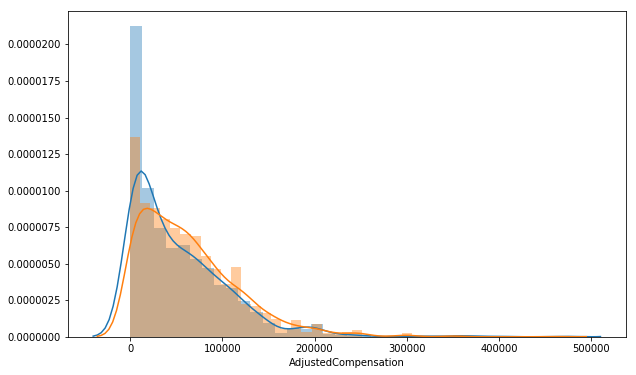

In [76]:
#outlier threshold taken from the study of percentiles above
outlier_threshold = 500000
mast_wo = mast_salaries[mast_salaries < 500000]
bach_wo = bach_salaries[bach_salaries < 500000]

fig = plt.figure(figsize=(10,6))
sns.distplot(bach_wo)
sns.distplot(mast_wo)

print('Comparison of {} for {} and {}'.format('AdjustedCompensation', 'Master\'s degree', 'Bachelor\'s degree'))
print("Median Values: \tMaster\'s: {} \tBachelor\'s: {}".format(round(mast_wo.median(),2), round(bach_wo.median(),2)))
print("Mean Values: \tMaster\'s: {} \tBachelor\'s: {}".format(round(mast_wo.mean(),2), round(bach_wo.mean(),2)))
print("Sample Sizes: \tMaster\'s: {} \tBachelor\'s: {}".format(len(mast_wo), len(bach_wo)))
print("Welch's t-test p-value:", p_value_welch_ttest(mast_wo, bach_wo))
 


With the outliers removed, the t-test p_val is now below the alpha threshold and so we reject the null hypothesis that there is no difference.  

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

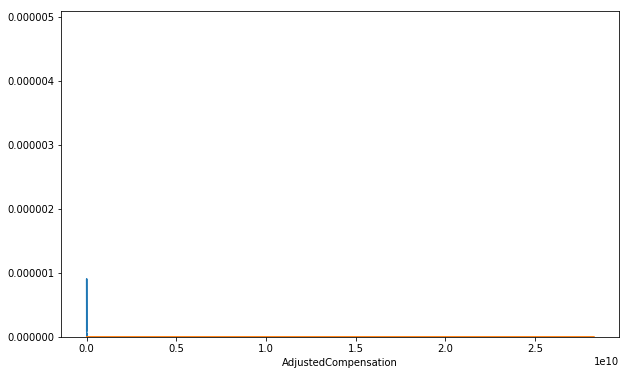

Comparison of AdjustedCompensation for Doctoral degree and Bachelor's degree
Median Values: 	Doctoral: 74131.92 	Bachelor's: 38399.4
Mean Values: 	Doctoral: 29566175.76 	Bachelor's: 64887.1
Sample Sizes: 	Doctoral: 967 	Bachelor's: 1107
Welch's t-test p-value: 0.1568238199472023


In [80]:
doct_salaries = data[data['FormalEducation']=='Doctoral degree']['AdjustedCompensation'].dropna()

fig = plt.figure(figsize=(10,6))
sns.distplot(bach_salaries)
sns.distplot(doct_salaries)
plt.show()

print('Comparison of {} for {} and {}'.format('AdjustedCompensation', 'Doctoral degree', 'Bachelor\'s degree'))
print("Median Values: \tDoctoral: {} \tBachelor\'s: {}".format(round(doct_salaries.median(),2), round(bach_salaries.median(),2)))
print("Mean Values: \tDoctoral: {} \tBachelor\'s: {}".format(round(doct_salaries.mean(),2), round(bach_salaries.mean(),2)))
print("Sample Sizes: \tDoctoral: {} \tBachelor\'s: {}".format(len(doct_salaries), len(bach_salaries)))
print("Welch's t-test p-value:", p_value_welch_ttest(doct_salaries, bach_salaries))



In [81]:
for q in np.linspace(.8, 1, num=21):
    s1q =  round(doct_salaries.quantile(q=q), 2)
    s2q =  round(bach_salaries.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), s1q, s2q))

0.8th percentile:	set1: 135000.0	set2: 93233.13
0.81th percentile:	set1: 140000.0	set2: 95572.83
0.82th percentile:	set1: 140000.0	set2: 99276.38
0.83th percentile:	set1: 146796.17	set2: 100000.0
0.84th percentile:	set1: 150000.0	set2: 103040.0
0.85th percentile:	set1: 150000.0	set2: 105935.04
0.86th percentile:	set1: 155000.0	set2: 110000.0
0.87th percentile:	set1: 160000.0	set2: 112000.0
0.88th percentile:	set1: 160000.0	set2: 115000.0
0.89th percentile:	set1: 166480.0	set2: 120000.0
0.9th percentile:	set1: 172057.78	set2: 120346.5
0.91th percentile:	set1: 175000.0	set2: 126460.0
0.92th percentile:	set1: 181555.2	set2: 132615.4
0.93th percentile:	set1: 191900.0	set2: 140000.0
0.94th percentile:	set1: 200000.0	set2: 143408.8
0.95th percentile:	set1: 200000.0	set2: 150000.0
0.96th percentile:	set1: 220999.61	set2: 179849.74
0.97th percentile:	set1: 240879.14	set2: 195000.0
0.98th percentile:	set1: 277349.78	set2: 200000.0
0.99th percentile:	set1: 336800.0	set2: 250000.0
1.0th percentil

Comparison of AdjustedCompensation for Doctoral degree and Bachelor's degree
Median Values: 	Doctoral: 73152.77 	Bachelor's: 38292.15
Mean Values: 	Doctoral: 86194.98 	Bachelor's: 53744.35
Sample Sizes: 	Doctoral: 964 	Bachelor's: 1103
Welch's t-test p-value: 0.0


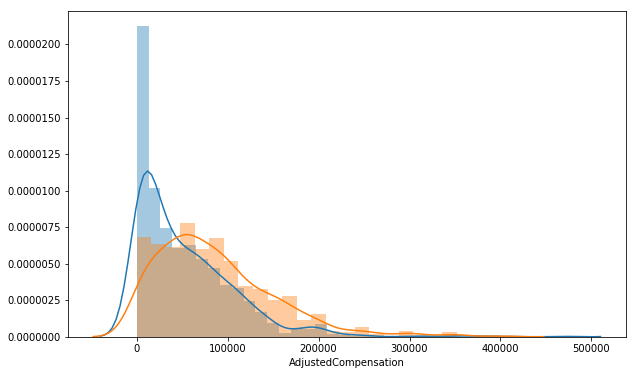

In [85]:
#outlier threshold taken from the study of percentiles above
outlier_threshold = 500000
doct_wo = doct_salaries[doct_salaries < 500000]

fig = plt.figure(figsize=(10,6))
sns.distplot(bach_wo)
sns.distplot(doct_wo)

print('Comparison of {} for {} and {}'.format('AdjustedCompensation', 'Doctoral degree', 'Bachelor\'s degree'))
print("Median Values: \tDoctoral: {} \tBachelor\'s: {}".format(round(doct_wo.median(),2), round(bach_wo.median(),2)))
print("Mean Values: \tDoctoral: {} \tBachelor\'s: {}".format(round(doct_wo.mean(),2), round(bach_wo.mean(),2)))
print("Sample Sizes: \tDoctoral: {} \tBachelor\'s: {}".format(len(doct_wo), len(bach_wo)))
print("Welch's t-test p-value:", p_value_welch_ttest(doct_wo, bach_wo))



Similar to the prior example, we fail to reject the null hypothesis when outliers are included and reject it when they are removed.  There seems to be a statistically significant difference between the salaries of the educational groups.  

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [89]:
#Your code here
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula,data).fit()
table = sm.stats.anova_lm(lm,typ=2)
print(table)


                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [90]:
data_wo = data[data.AdjustedCompensation <= 500000]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula,data_wo).fit()
table = sm.stats.anova_lm(lm,typ=2)
print(table)


                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


The ANOVA table results agree with our t-tests.  With outliers included, the ANOVA table states that the null hypothesis fails to be rejected.  When removed, however, there is significant evidence that education levels leads to different salaries.  

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!